<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Deep-CNN-Architecture-Implementation/blob/main/Complex_New_Model_KUET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

## Mount Drive

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'

In [39]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preparatin using ImageDataGenerator

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
WIDTH=224
HEIGHT=224

In [42]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    #horizontal_flip=True,
                                    #shear_range=0.1 ,
                                    #zoom_range=0.1,
                                    #rotation_range=20,
                                    #height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [43]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [44]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [45]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [46]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

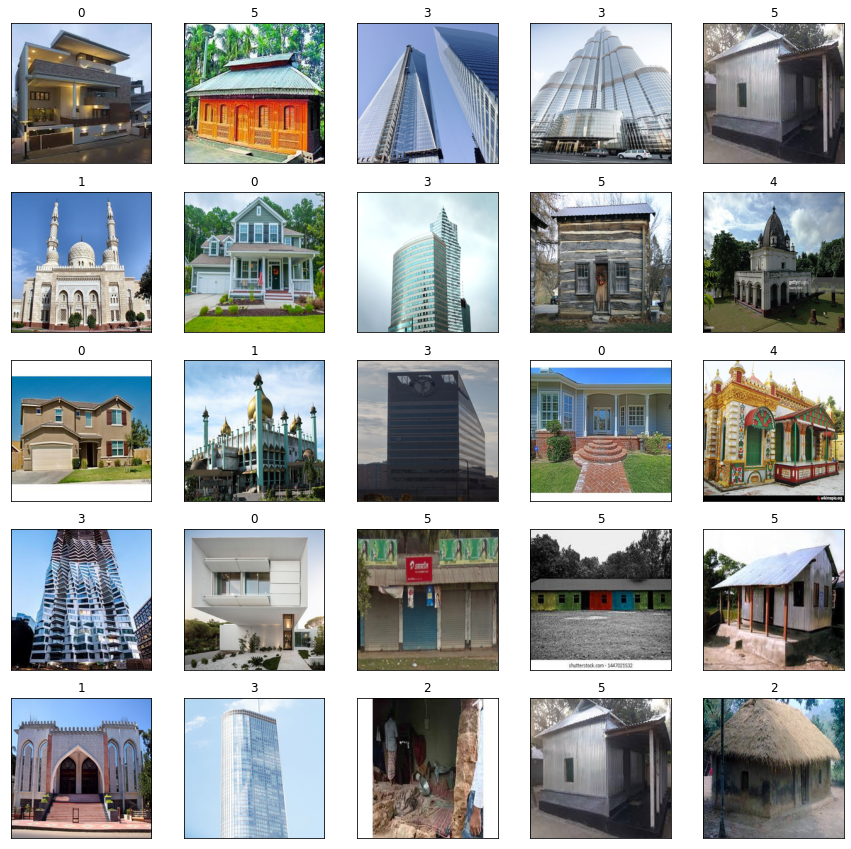

In [47]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

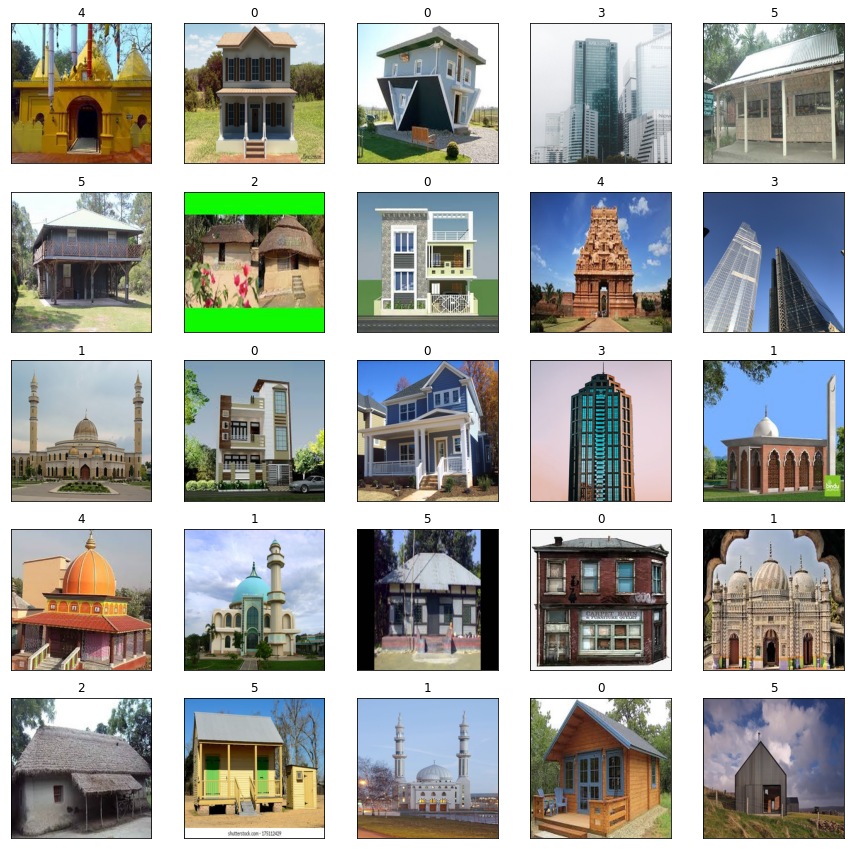

In [48]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import Library

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

## Create conv relu batchnorm  Block

In [50]:
def conv_relu_batchnorm(x, filters, kernel_size):
    x = layers.Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    return x

## Define Concatenation Block

In [51]:
def layer_concate(tensor,filters):
    x=conv_relu_batchnorm(tensor,filters,kernel_size=3)
    x=layers.Concatenate()([x,tensor])
    return x

## Define Model Input

In [52]:
inputs=layers.Input(shape=(224,224,3))

## Inplement Model Architecture

In [53]:
total_class=6

In [54]:
x=conv_relu_batchnorm(inputs,filters=32,kernel_size=3)
x=layer_concate(x,filters=32)

In [55]:
x=layers.MaxPool2D(pool_size=(2,2))(x)

In [56]:
x=conv_relu_batchnorm(x,filters=64,kernel_size=3)
x=layer_concate(x,filters=64)
x=layers.MaxPool2D(pool_size=(2,2))(x)

In [57]:
x=conv_relu_batchnorm(x,filters=128,kernel_size=3)
x=layer_concate(x,filters=128)
x=layers.MaxPool2D(pool_size=(2 ,2))(x)

In [58]:
x=layers.Dropout(0.2)(x)
x=layers.Flatten()(x)
x=layers.Dense(256,activation='relu')(x)
x=layers.Dropout(0.2)(x)

In [59]:
output=layers.Dense(total_class,activation='softmax')(x)

## Create Model

In [60]:
model=keras.Model(inputs,output,name='NewModel')

In [61]:
model.summary()

Model: "NewModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 224, 224, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 224, 224, 32) 128         conv2d_7[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 224, 224, 32) 9248        batch_normalization_7[0][0]      
___________________________________________________________________________________________

In [62]:
import time
print(time.time())

1625062130.8114247


In [63]:
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/NewModelKUET'+str(int(t))+'.png'
image_name

'/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/NewModelKUET1625062130.png'

/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/NewModelKUET1625062130.png


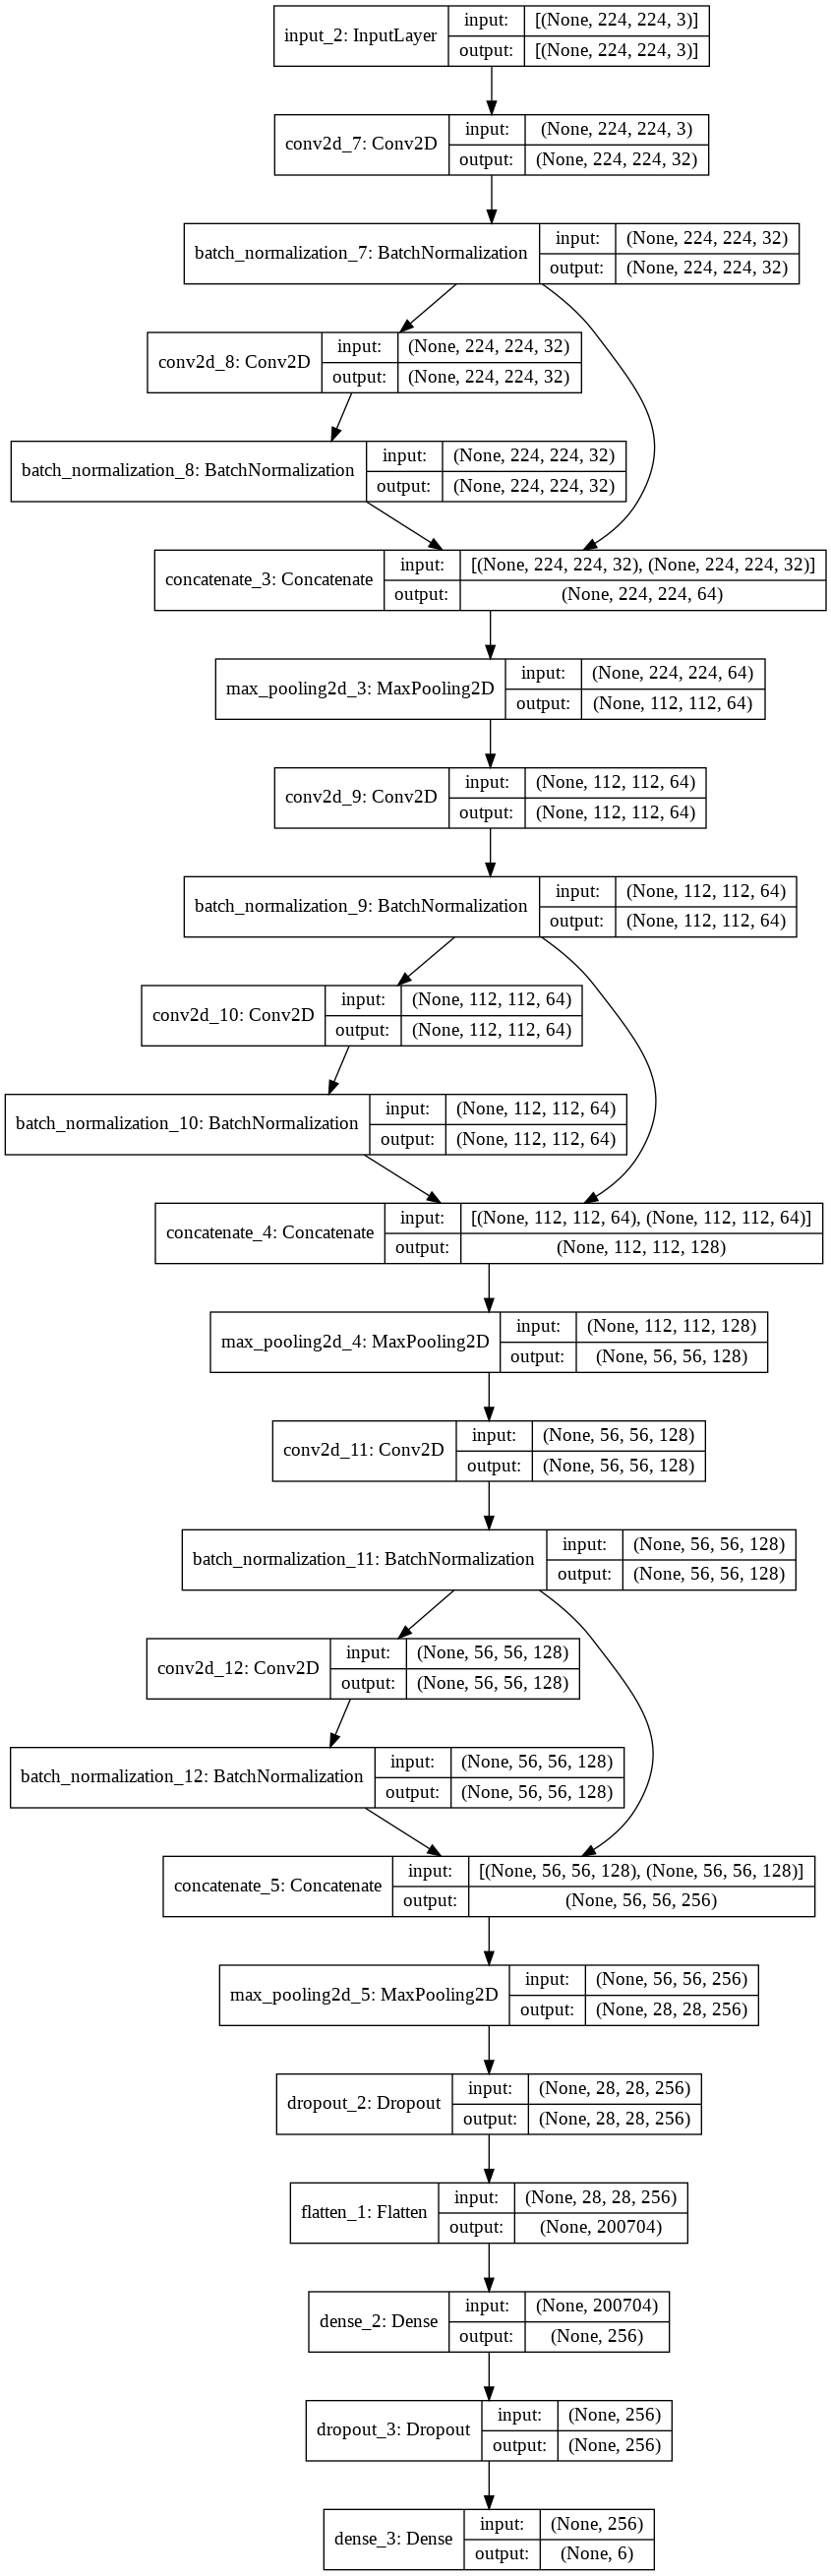

In [64]:
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/NewModelKUET'+str(int(t))+'.png'
print(image_name)
plot_model(model,show_shapes=True,to_file=image_name)

In [65]:
## Compile The Model 

In [66]:
model.compile( loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained the Model

In [67]:
epochs=200
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [68]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps)

Epoch 1/200
30/30 [==============================] - 646s 21s/step - loss: 34.4111 - accuracy: 0.4417 - val_loss: 63.6386 - val_accuracy: 0.2098
Epoch 2/200
30/30 [==============================] - 13s 414ms/step - loss: 5.5810 - accuracy: 0.5677 - val_loss: 27.0698 - val_accuracy: 0.2857
Epoch 3/200
30/30 [==============================] - 13s 415ms/step - loss: 3.6802 - accuracy: 0.6031 - val_loss: 32.4921 - val_accuracy: 0.3304
Epoch 4/200
30/30 [==============================] - 13s 415ms/step - loss: 2.1731 - accuracy: 0.6562 - val_loss: 86.9728 - val_accuracy: 0.1696
Epoch 5/200
30/30 [==============================] - 13s 412ms/step - loss: 1.7703 - accuracy: 0.6510 - val_loss: 72.2411 - val_accuracy: 0.2411
Epoch 6/200
30/30 [==============================] - 12s 411ms/step - loss: 1.5024 - accuracy: 0.7031 - val_loss: 30.0255 - val_accuracy: 0.3839
Epoch 7/200
30/30 [==============================] - 12s 411ms/step - loss: 1.1200 - accuracy: 0.6958 - val_loss: 125.7065 - val_a

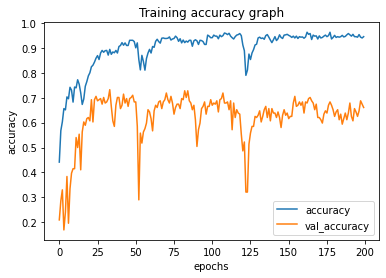

In [69]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

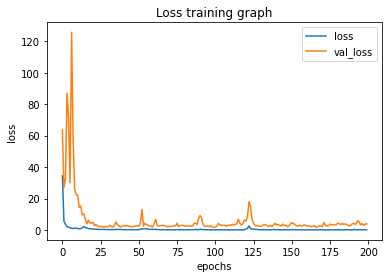

In [70]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [71]:
test_loss,test_accuracy=model.evaluate(test_dataset)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)


10/10 [==============================] - 158s 18s/step - loss: 5.6952 - accuracy: 0.6700
Test Loss:  5.69521427154541
Test Accuracy:  0.6700000166893005


## Saved Model

In [72]:
import time
t = time.time()

export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/NewModelKUET{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/NewModelKUET0.6700000166893005_model_1625065499.h5


In [73]:
from tensorflow.keras.models import load_model

In [74]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()


Model: "NewModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 224, 224, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 224, 224, 32) 128         conv2d_7[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 224, 224, 32) 9248        batch_normalization_7[0][0]      
___________________________________________________________________________________________